In [8]:
from BandExcitation.Measurement.NI import FunctionGenerator, Oscilloscope, PXI
from BandExcitation.Measurement.BEWaveform import BE_Spectroscopy
from BandExcitation.Measurement.BEMeasurement import BEMeasurement
from BandExcitation.File.DataWriter import DataConverter

from BandExcitation.Hardware import AO
import matplotlib.pyplot as plt
import numpy as np

In [2]:
beparms = BEMeasurement(spectroscopic_min_voltage=-4, 
                   spectroscopic_max_voltage=4, 
                   spectroscopy_type="BE Line",
                   BE_rep=2, 
                   BE_time = 4e-3,
                   BE_ampl = 1,
                   AI_sample_rate=2e6, 
                   BE_ppw = 2**13,
                   BE_center_freq = 340e3, 
                   BE_bandwidth = 60e3, 
                   BE_num_bins = 400,
                   AI_photodiode_vertical_range=1,
                   AI_AWG_channel_num=1,
                   BE_smoothing = 125
                  )

Initializing BEparams
PXI1Slot6


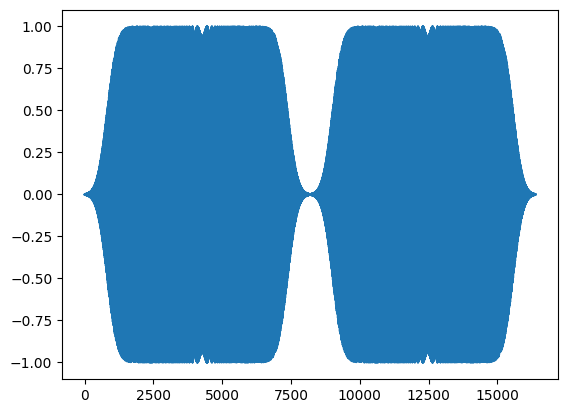

In [3]:
plt.plot(beparms.be_spectroscopy.cantilever_excitation_waveform)

In [9]:
wave = beparms.get_simulated_BE_measurement()[0:int(beparms.AI_sample_rate*beparms.BE_time)]

dc = DataConverter(wave)

BE_FFT = DataConverter.BE_FFT(wave)
freqs = DataConverter.BE_frequencies(len(wave), beparms.AI_sample_rate)
#inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-(beparms.BE_bandwidth*.85)/2, beparms.BE_center_freq+(beparms.BE_bandwidth*.85)/2), beparms.BE_num_bins)
inds = DataConverter.extract_freq_range(freqs, (beparms.BE_center_freq-(beparms.BE_bandwidth)/2, beparms.BE_center_freq+(beparms.BE_bandwidth)/2))



(310000.0, 370000.0)


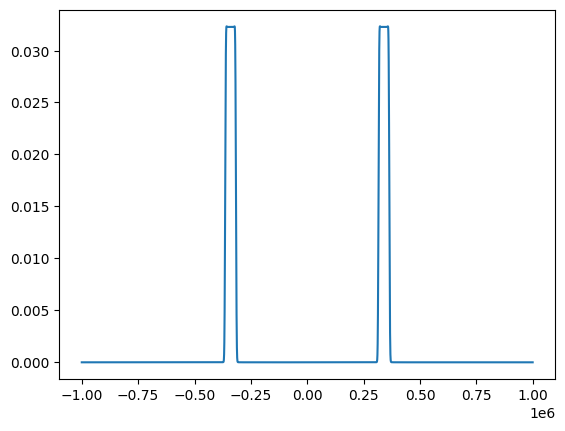

In [10]:
plt.plot(freqs, np.abs(BE_FFT))

In [4]:
measurement = beparms.PXI.run()

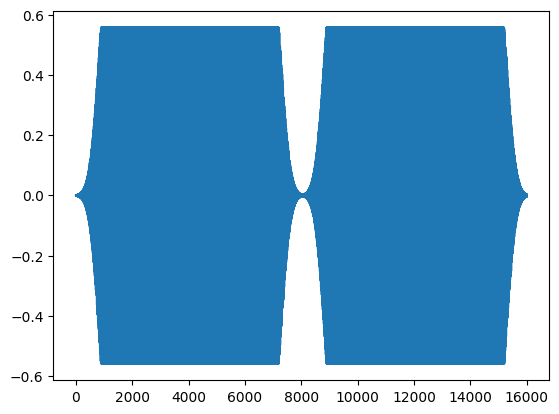

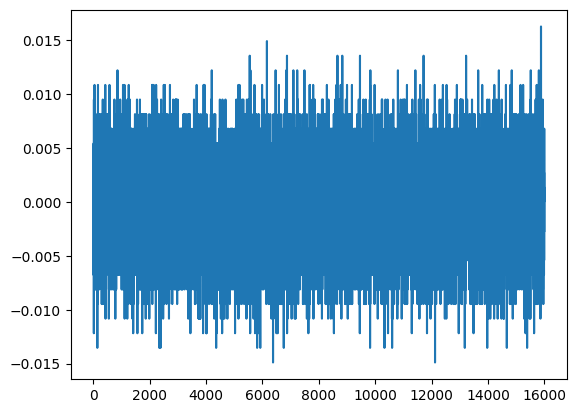

In [7]:

plt.plot(np.array(measurement[0].samples))
plt.figure()
plt.plot(np.array(measurement[1].samples))